<h2>Import bibliotek</h2>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Zadanie 1.</h2>

<h4>Pochodne tangensa</h4>

In [8]:
# 1st derivative of tan
def dtan_dx(x):
    return 1 + np.tan(x)**2

# 2nd derivative of tan
def d2tan_dx2(x):
    return 2*np.tan(x) * dtan_dx(x)

# 3rd derivative of tan
def d3tan_dx3(x):
    return 2*(dtan_dx(x)**2) + 2*np.tan(x) * d2tan_dx2(x)

<h4>Wartość x i wartości h</h4>

In [11]:
# x value
x = 1
# h spacings
h_spacings = np.array([10**-i for i in range(0,17)])

<h4>Wartość $\epsilon$</h4>

In [12]:
# epsilon
eps = 1.0
while eps + 1 > 1:
    eps /= 2
eps *= 2

<h3>1.1 Różnica prawostronna</h3>

<h4>Definicja pochodnej</h4>

In [10]:
# return a function f(x,h) calculating a forward difference
def df_dx_forward(f):
    return lambda x, h: (f(x+h) - f(x)) / h

<h4>Porównanie wartości obliczonych z wartością prawdziwą</h4>

Obliczenie wartości oraz ich błędów

In [13]:
# correct value
correct_val = dtan_dx(x)

# computed values
dtan_dx_forward = df_dx_forward(np.tan)
comp_vals = dtan_dx_forward(x, h_spacings)

# computational errors
comp_errs = np.abs(correct_val - comp_vals)

# truncation errors
M = np.abs(d2tan_dx2(x))
trunc_errs = M * h_spacings / 2

# rounding errors
round_errs = 2 * eps / h_spacings

Pokazanie błędów na wykresie

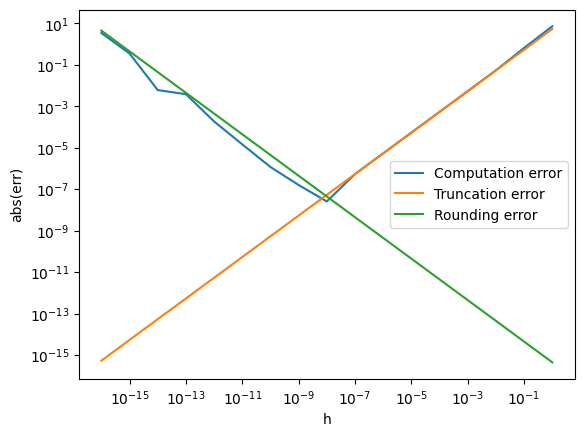

In [17]:
# set log scale
plt.xscale("log")
plt.yscale("log")
# add plots
plt.plot(h_spacings, comp_errs, label="Computation error")
plt.plot(h_spacings, trunc_errs, label="Truncation error")
plt.plot(h_spacings, round_errs, label="Rounding error")
# add labels
plt.xlabel("h")
plt.ylabel("abs(err)")
# show with legend
plt.legend()
plt.show()

<h4>Porównanie wartości h<sub>min</sub></h4>

In [16]:
# TODO

<h3>1.2 Różnica centralna</h3>

<h4>Definicja pochodnej</h4>

In [18]:
# return a function f(x,h) calculating a central difference
def df_dx_central(f):
    return lambda x, h: (f(x+h) - f(x-h)) / (2*h)

<h4>Porównanie wartości obliczonych z wartością prawdziwą</h4>

Obliczenie wartości oraz ich błędów

In [23]:
# correct value
correct_val = dtan_dx(x)

# computed values
dtan_dx_central = df_dx_central(np.tan)
comp_vals = dtan_dx_central(x, h_spacings)

# computational errors
comp_errs = np.abs(correct_val - comp_vals)

# truncation errors
M = np.abs(d3tan_dx3(x))
trunc_errs = M * h_spacings**2 / 2

# rounding errors
round_errs = eps / h_spacings

Pokazanie błędów na wykresie

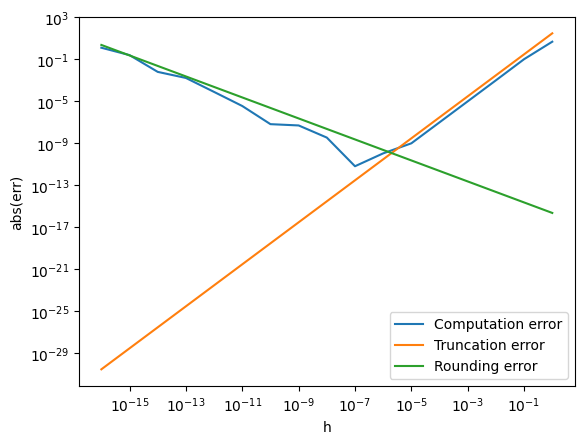

In [24]:
# set log scale
plt.xscale("log")
plt.yscale("log")
# add plots
plt.plot(h_spacings, comp_errs, label="Computation error")
plt.plot(h_spacings, trunc_errs, label="Truncation error")
plt.plot(h_spacings, round_errs, label="Rounding error")
# add labels
plt.xlabel("h")
plt.ylabel("abs(err)")
# show with legend
plt.legend()
plt.show()

<h4>Porównanie wartości h<sub>min</sub></h4>

In [16]:
# TODO

<h3>1.3 Porównanie obu metod</h3>

In [25]:
# TODO